# Antarctic contribution to sea level

Use IMBIE 2018, Rignot et al. 2019 and Shepherd et al. 2019 to compute Antarctic contribution to sea level



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

0.540569099799


,Antarctica
Year_int,
2010,3.490442
2011,4.026842
2012,4.509017
2013,5.132864
2014,5.893220
2015,6.665954
2016,7.011924
2017,7.552493
2018,8.093062


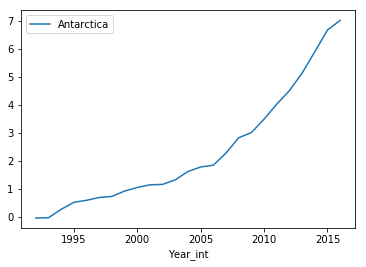

In [155]:
# Get IMBIE data
imbie_dir = '/Users/dewi/Work/Project_SeaLevelBudgets/Antarctica/IMBIE2018/'
im_df = pd.read_excel(imbie_dir  + 'imbie_dataset-2018_07_23.xlsx', sheet_name='Antarctica')
im_df = im_df.set_index('Year')
im_df = pd.DataFrame(data=dict( Antarctica=im_df[im_df.columns[2]]))

im_df['Year_int'] = im_df.index.astype(int)
grouped = im_df.groupby('Year_int', axis=0)
im_full_years = grouped.size() == 12
im_df = grouped.mean()
im_df = im_df[im_full_years]
im_df.plot()

# Extend the data to 1950
im_df = im_df.reindex(np.arange(1950,2017))
im_df = im_df.fillna(0)

# Extend the data a few years in the future
nby = 10
trend = np.polyfit(im_df.loc[2007:2016].index , im_df.loc[2007:2016].Antarctica, 1)[0]
print(trend)
for i in range(3):
    im_df.loc[im_df.index.max() + 1] = im_df.Antarctica.iloc[-1] + trend
im_df.iloc[-10:]

In [104]:
# Mass balance from table 2 of Rignot et al. 2019
Time = np.arange(1979, 2018)
dM_79_89 = 40  #Gt/y
dM_89_99 = 49.6
dM_99_09 = 165.8 
dM_09_17 = 251.9
MB = np.zeros(len(Time))
MB[0:9] = dM_79_89
MB[9:19] = dM_89_99
MB[19:29] = dM_99_09
MB[29:len(Time)+1] = dM_09_17
MBcum = MB.cumsum()
SLR = MBcum / 360  # SLR in mm
SLR


array([  0.11111111,   0.22222222,   0.33333333,   0.44444444,
         0.55555556,   0.66666667,   0.77777778,   0.88888889,
         1.        ,   1.13777778,   1.27555556,   1.41333333,
         1.55111111,   1.68888889,   1.82666667,   1.96444444,
         2.10222222,   2.24      ,   2.37777778,   2.83833333,
         3.29888889,   3.75944444,   4.22      ,   4.68055556,
         5.14111111,   5.60166667,   6.06222222,   6.52277778,
         6.98333333,   7.68305556,   8.38277778,   9.0825    ,
         9.78222222,  10.48194444,  11.18166667,  11.88138889,
        12.58111111,  13.28083333,  13.98055556])

In [158]:
#Fit a second order polynomial and check that the total is ok
xy = np.array([1984, 1994, 2004, 2013])
dM = [dM_79_89, dM_89_99, dM_99_09, dM_09_17]

dM2f = np.polyfit(xy - xy[0], dM, 2)
xy2 = np.arange(1979,2019)

dM2 = dM2f[0] * (xy2 - xy[0])**2 + dM2f[1] * (xy2 - xy[0]) + dM2f[2]

slr_rig = dM2.cumsum() / 360
slr_rig_df = pd.DataFrame(data = dict(time= xy2, slr = slr_rig))
slr_rig_df = slr_rig_df.set_index('time')
slr_rig_df = slr_rig_df.reindex(np.arange(1950,2019)).fillna(0)
slr_rig_df

,slr
time,
1950,0.000000
1951,0.000000
1952,0.000000
1953,0.000000
1954,0.000000
1955,0.000000
1956,0.000000
1957,0.000000
1958,0.000000


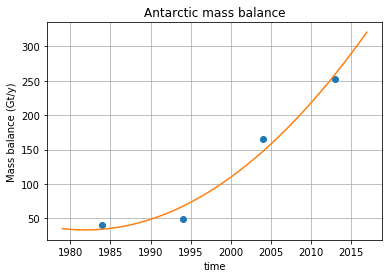

In [135]:
#Plot time series mass loss
fig, ax = plt.subplots() #figsize=(12,12)
ax.plot(xy, dM, 'o')
ax.plot(xy2, dM2, '-')
#ax.set_aspect(1)
plt.xlabel('time')
plt.ylabel('Mass balance (Gt/y)')
plt.title('Antarctic mass balance')
ax.grid(True)

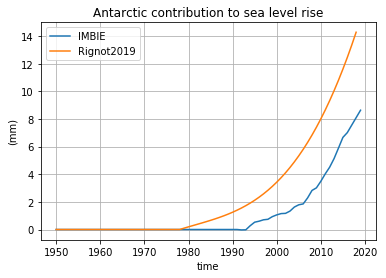

In [159]:
#Plot time series sea level rise
fig, ax = plt.subplots() #figsize=(12,12)
ax.plot(im_df, '-', label='IMBIE')
ax.plot(slr_rig_df , '-', label='Rignot2019')
#ax.set_aspect(1)
plt.xlabel('time')
plt.ylabel('(mm)')
plt.title('Antarctic contribution to sea level rise')
ax.grid(True)
plt.legend(loc='upper left')

In [144]:
# To do: extend the time series in the past and future for IMBIE